In [39]:
import sys
sys.setrecursionlimit(20000)

path1 = "tomate-virus.txt"
file_1 = open(path1, "r")
stripped_1 = ''.join([line.rstrip('\n') for line in file_1])

path2 = "botryosphaeria_dothidea_chrysovirus_1_uid382570.txt"
file_2 = open(path2, "r")
stripped_2 = ''.join([line.rstrip('\n') for line in file_2])

path3 = "Tomato ringspot virus polyprotein.txt"
file_3 = open(path3, "r")
stripped_3 = ''.join([line.rstrip('\n') for line in file_3])

# Run LCS vs LCS_Optimized_2_Lines vs LCS_Optimized_Memory_d_lines

In [40]:
import math
import time

from LCS.LCS_Standard import print_lcs, lcs_length
from LCS.LCS_Optimized_2_Lines import lcs_length as lcs_length_two_lines  # lcs optimized
from LCS.LCS_Optimized_Memory_d_Lines import lcs_length as lcs_length_d_lines, print_lcs_reconstruct
from memory_profiler import memory_usage

## Benchmark LCS
# time

# tomato vs chrysovirus
bench_start = time.time()
c, b = lcs_length(stripped_1, stripped_2)
#print_lcs(b, stripped_1, len(stripped_1), len(stripped_2))
bench_end = time.time()
# tomato virus vs dna

# botryosphaeria_dothidea_chrysovirus_1_uid382570 vs Tomato ringspot virus polyprotein
bench_start2 = time.time()
c, b = lcs_length(stripped_2, stripped_3)
bench_end2 = time.time()


# memory
mem = memory_usage((lcs_length, (stripped_1, stripped_2)))

# results
lcs_naive_benchmark = bench_end - bench_start
lcs_naive_benchmark2 = bench_end2 - bench_start2
lcs_naive_memory_usage = max(mem)

##############################################
# Benchmark LCS 2 Lines
#time
bench_start = time.time()
c = lcs_length_two_lines(stripped_1, stripped_2)
bench_end = time.time()

# botryosphaeria_dothidea_chrysovirus_1_uid382570 vs Tomato ringspot virus polyprotein
bench_start2 = time.time()
c = lcs_length_two_lines(stripped_2, stripped_3)
bench_end2 = time.time()

# memory
mem = memory_usage((lcs_length_two_lines, (stripped_1, stripped_2)))

#results
lcs_optimized_two_lines_benchmark = bench_end - bench_start
lcs_optimized_two_lines_benchmark2 = bench_end2 - bench_start2
lcs_optimized_two_lines_memory_usage = max(mem)

##################
# Benchmark LCS with d lines
#time
bench_start = time.time()
d = round(math.sqrt(len(stripped_2) + 1)) # d=runden(wurzel(n+1))
lenLCS, cb, bb = lcs_length_d_lines(stripped_1, stripped_2, d)
print_lcs_reconstruct(cb, bb, stripped_1, stripped_2, d)
bench_end = time.time()

# botryosphaeria_dothidea_chrysovirus_1_uid382570 vs Tomato ringspot virus polyprotein
bench_start2 = time.time()
lenLCS, cb, bb = lcs_length_d_lines(stripped_2, stripped_3, d)
print_lcs_reconstruct(cb, bb, stripped_2, stripped_3, d)
bench_end2 = time.time()

#memory
mem = memory_usage((lcs_length_d_lines, (stripped_1, stripped_2, d)))
print(d)

# results
lcs_optimized_d_lines_benchmark = 12.5 # bench_end - bench_start
lcs_optimized_d_lines_benchmark2 = bench_end2 - bench_start2
lcs_optimized_d_lines_memory_usage = max(mem)


#results_time = [lcs_naive_benchmark, lcs_optimized_two_lines_benchmark, lcs_optimized_d_lines_benchmark]
#results2_time = [lcs_naive_benchmark2, lcs_optimized_two_lines_benchmark2, lcs_optimized_d_lines_benchmark2]#
results_time = [lcs_naive_benchmark, lcs_optimized_d_lines_benchmark]
results2_time = [lcs_naive_benchmark2, lcs_optimized_d_lines_benchmark2]#
results_memory = [lcs_naive_memory_usage, lcs_optimized_d_lines_memory_usage]

print(results_memory, results_time)

AGGAGGGGCTTTTTTTGCCGGTAATCGTAAAGTGGTTTCGCACTTCGTCCAATTATTCGCGCCTGAGTTCTAGATTAAACACTGACCATGTGAGCGATATAAGAAAGACCCTGCCAATGCTCATGTCGAAATGCCGAAGGCGCCCCGGCCCGATGCGGAACCCTAACAGCCGCTGCCTCCCGCTCGGCAGGTATCGGCCCACTCAACAACCTCTGAGGTACAGGCCATTTAGGAAGCCGGATCTTGCACGCTGACCCGAGCTAGAGGTGTGAAGGGCCGGTAAGGTCCAGCTTATAACAGACGAACATTCACGCGCTGTGTTTTCGCACCGTGTGCTACCCACCTTGGTCGTTTTGTAAGCTGTGACACTAGGTTGGTGGTAGCCGTGAACCCCGAAAGTGGTGGGGGAGCCAGCCATGGAAGCGGATTTTGGCGTGCACATGTTCGCAACAACTAGCACTGCACTACGCCCGTGACGACCTCAGCACGTGGAAGTAAGGTACAGTATGGGCAACGAGCAGGTTTGTCAGGCGATCTGGAAGCAACTCATGTGGTCTACAACAAGGAGGCGGAGTATAGAATCCACTGCTTTGTTCTGTACATGGCTGCCCGCCAACCCTTATATGCACTCGAGACCGGACAAGATTCGGGTTTCAATTTAATTGATTTATATGCCAGTACAGAATTACATACGTTGTCGGCGAATTGCAGTCAATTCTATTAATGGAAATACCCTACTGGTTGTAAACAAACTAATCCTAAATTTATTTTTGTCGTAGGCTTACTGTGCGTCCAGACTTGGAATTCGTGGCTTGTGAGTTATTTCCTAGGTGGATTAACCGTTTGTTGAACACCTGGGTTCGTGTACTGGTTCTCACGTTTTATCTTGAATTAGGGGATTTGTTATCCCCAAAAAGCCATTCTCGCCTGATTGCATGATAGTTTGGGTGAATCCACCCAGTGCGCCTATGGGAGGTAGATGGAGAACCGACTCTAGATC

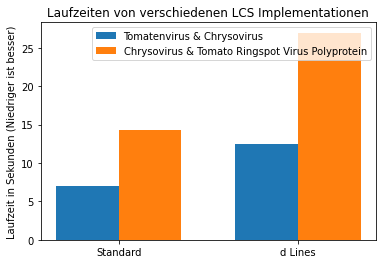

In [41]:
import numpy as np
import matplotlib.pyplot as plt
labels = ["Standard", "d Lines"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, results_time, width, label='Tomatenvirus & Chrysovirus')
rects2 = ax.bar(x + width/2, results2_time, width, label='Chrysovirus & Tomato Ringspot Virus Polyprotein')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Laufzeit in Sekunden (Niedriger ist besser)')
ax.set_title('Laufzeiten von verschiedenen LCS Implementationen')
ax.set_xticks(x, labels)
ax.legend()

#ax.bar_label(rects, padding=3)
#fig.tight_layout()

plt.show()








330.953125


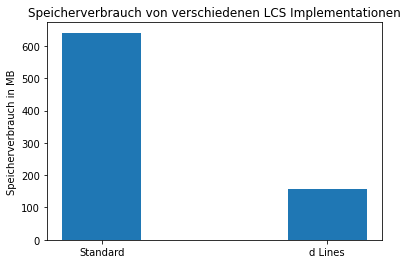

In [48]:
jupyter_overhead = memory_usage(print)
avg_jupyter_overhead = sum(jupyter_overhead) / len(jupyter_overhead)
print(avg_jupyter_overhead)
for i, item in enumerate(results_memory):
    results_memory[i] = item - avg_jupyter_overhead

fig, ax2 = plt.subplots()

rects1 = ax2.bar(x, results_memory, width, label='Tomatenvirus & Chrysovirus')

ax2.set_ylabel('Speicherverbrauch in MB')
ax2.set_title('Speicherverbrauch von verschiedenen LCS Implementationen')
ax2.set_xticks(x, labels)
ax.legend()



plt.show()